link do dataset: https://www.kaggle.com/laotse/credit-risk-dataset?select=credit_risk_dataset.csv


# Análise de risco de crédito

# Objetivo : 

## Identificar quais variáveis influenciam na classificação do empréstimo como sendo de risco ou não.

##  Analisar o comportamento dessas variáveis em  função do risco de crédito.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dados_analise_risco_de_cresdito.csv')

In [3]:
df.head()

,idade,tempo_de_emprego,tipo_moradia,objetivo_emprestimo,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,inadimplencia_hist,qtd_anos_primeiro_emprestimo,risco_emprestimo,tipo_moradia_id,objetivo_emprestimo_id,class_risco_historico_id
0,21,5.0,propria,educacao,1000,11.14,9600,0.10,B,0,2,0,3,1,1
1,25,1.0,hipoteca,saude,5500,12.87,9600,0.57,C,0,3,1,1,5,2
2,23,4.0,alugada,saude,35000,15.23,65500,0.53,C,0,2,1,0,5,2
3,24,8.0,alugada,saude,35000,14.27,54400,0.55,C,1,4,1,0,5,2
4,21,2.0,propria,risco,2500,7.14,9900,0.25,A,0,2,1,3,4,0


# EDA

- Utilizando a matriz de correlação identifiquei as variáveis que tem maior correlação com risco de empréstimo.

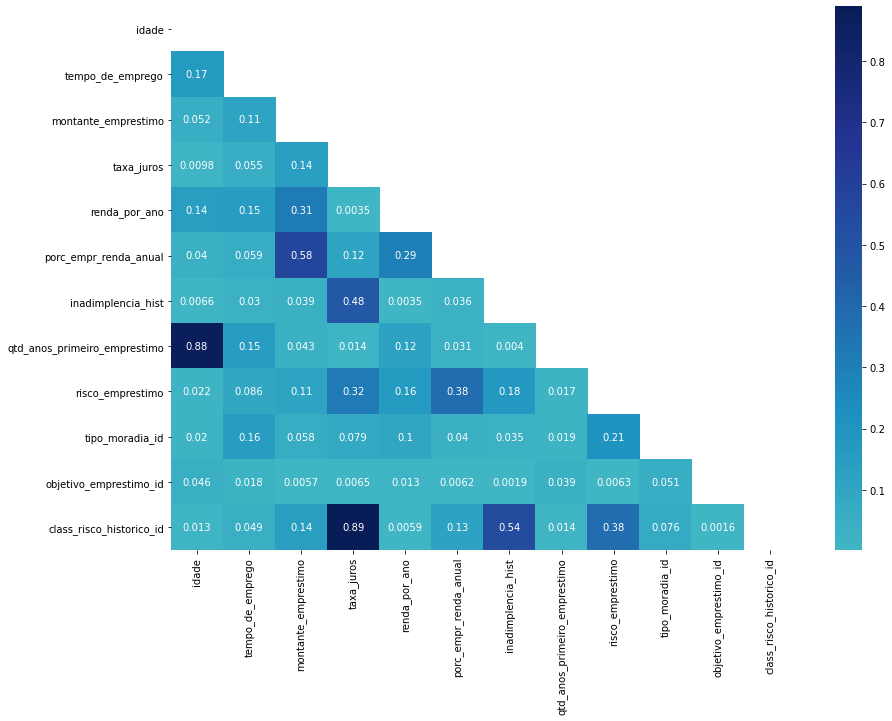

In [4]:
plt.figure(figsize=(14,10))

corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

plt.show()

In [35]:
df[['tipo_moradia','inadimplencia_hist','taxa_juros','porc_empr_renda_anual','class_risco_historico','risco_emprestimo']].head(10)

,tipo_moradia,inadimplencia_hist,taxa_juros,porc_empr_renda_anual,class_risco_historico,risco_emprestimo
0,propria,0,11.14,0.10,B,0
1,hipoteca,0,12.87,0.57,C,1
2,alugada,0,15.23,0.53,C,1
3,alugada,1,14.27,0.55,C,1
4,propria,0,7.14,0.25,A,1
5,alugada,0,12.42,0.45,B,1
6,alugada,0,11.11,0.44,B,1
7,alugada,0,8.90,0.42,A,1
8,propria,0,14.74,0.16,D,1
9,alugada,0,10.37,0.41,B,1


# Tipo de moradia 

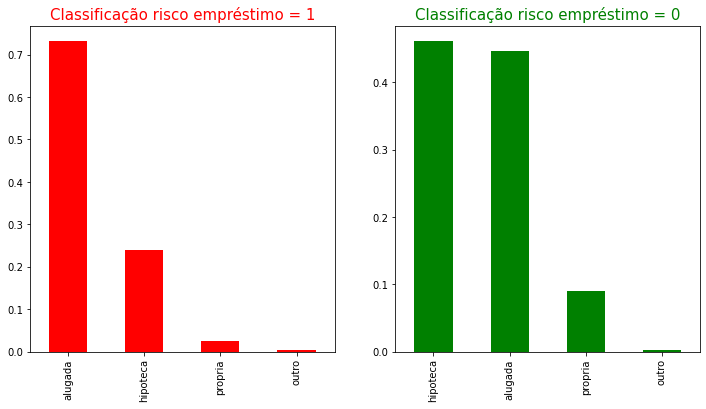

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['risco_emprestimo'] == 1 ].tipo_moradia.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='r')
ax[0].set_title('Classificação risco empréstimo = 1',fontsize=15,color='r')

df[df['risco_emprestimo'] == 0 ].tipo_moradia.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Classificação risco empréstimo = 0',fontsize=15,color='green')

plt.show()

Analisando os graficos acimas podemos concluir que:

  Quando o empréstimo é considerado de risco, tem mais de 70% chance do tipo de moradia ser alugada.
  
  
  Se não há risco de empréstimo --> +/- 44 % mora em cassa hipotecada
  
  Se não há risco de empréstimo -->  +/- 44 % mora em cassa alugada

# Inadimplência histórica

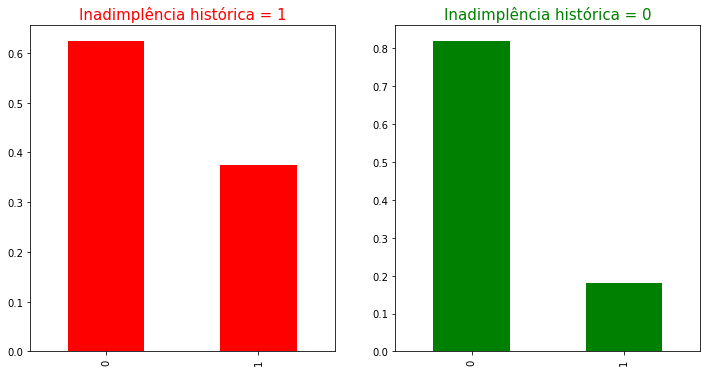

In [30]:
fig, ax = plt.subplots(1,2, figsize=(12,6))


df[df['inadimplencia_hist'] ==1 ].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='r')
ax[0].set_title('Inadimplência histórica = 1',fontsize=15, color='r')


df[df['inadimplencia_hist'] == 0 ].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Inadimplência histórica = 0',fontsize=15,color='green')


plt.show()

Analisando os gráficos acimas pode-se concluir que :


- Quando há histórico de inadimplência , existe também uma tendência maior do empréstimo ser classificado como de risco.

# Taxa de juros empregada no empréstimo


# Porcentagem da renda anual

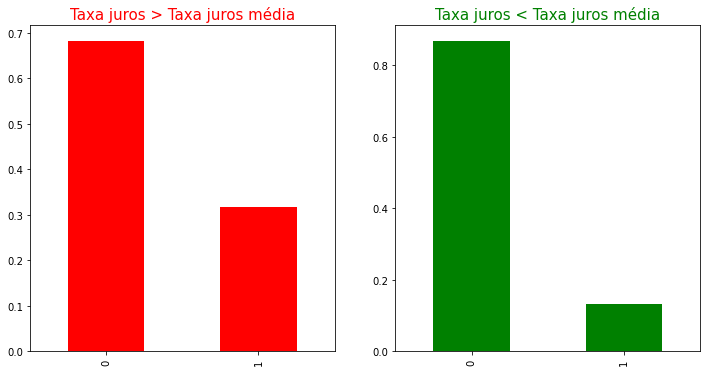

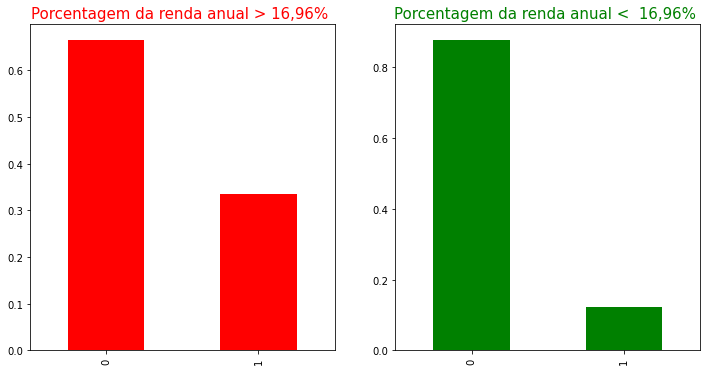

In [32]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['taxa_juros'] > 11.037157].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='red')
ax[0].set_title('Taxa juros > Taxa juros média',fontsize=15,color='red')


df[df['taxa_juros'] < 11.037157].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Taxa juros < Taxa juros média',fontsize=15,color='green')




fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['porc_empr_renda_anual'] > 0.169612].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='red')
ax[0].set_title('Porcentagem da renda anual > 16,96% ',fontsize=15,color='red')

df[df['porc_empr_renda_anual'] < 0.169612].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Porcentagem da renda anual <  16,96% ',fontsize=15,color='green')

plt.show()

Analisando os gráficos acimas pode-se concluir que :

- Quando a taxa de juros ou a porcentagem da renda anual são maiores que a média, aumenta também a chance do empréstimo ser classificado como de risco.

# Classificação de risco histórico

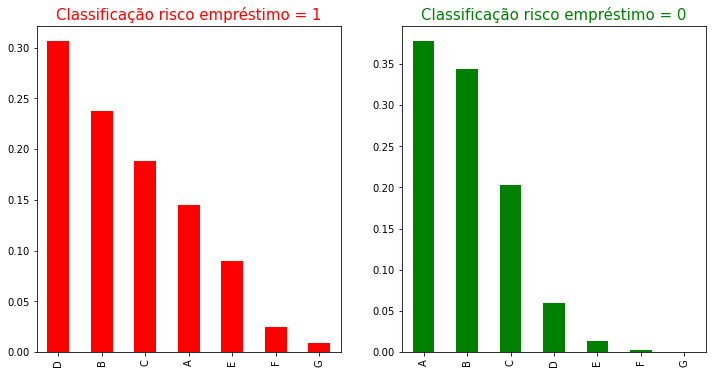

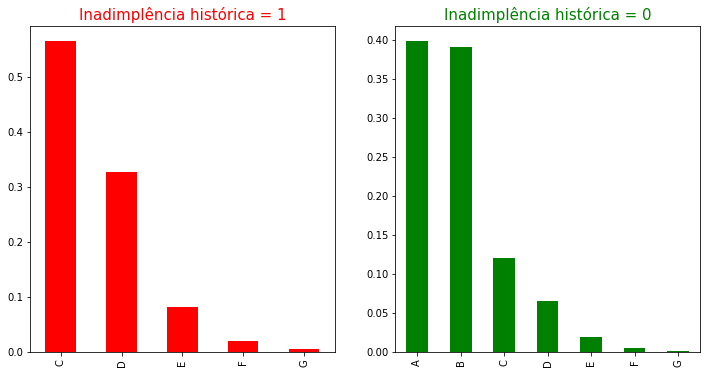

In [16]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['risco_emprestimo'] ==1 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='red')
ax[0].set_title('Classificação risco empréstimo = 1',fontsize=15,color='red')

df[df['risco_emprestimo'] == 0 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Classificação risco empréstimo = 0',fontsize=15,color='green')



fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['inadimplencia_hist'] ==1 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='red')
ax[0].set_title('Inadimplência histórica = 1',fontsize=15,color='red')

df[df['inadimplencia_hist'] == 0 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Inadimplência histórica = 0',fontsize=15,color='green')

plt.show()

Analisando os graficos acimas podemos concluir que:

  Quem pertence a classe A ou classe B pode ser considerado como bom pagador.
  
  Quem pertence a classe D está fortemente relacionado a empréstimo de risco.
  
  Quem pertence a classe C  está fortemente relacionado a ter um histórico de inadimplência.